In [30]:
from __future__ import division
import os
import sys
import copy
import numpy as np
from numpy import ma
import math as m
import pandas as pd
import string

import pickle
from numpy import genfromtxt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as colors

import datetime
from matplotlib.dates import DayLocator, MonthLocator, HourLocator, AutoDateLocator, DateFormatter, drange
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator
from numpy import arange
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import matplotlib.cm as cm
import matplotlib.mlab as mlab

import glob

In [115]:
darkblue = '#4e79a7'
orange = '#f28e2b'
red = '#e15759'
lightblue = '#76b7b2'
green = '#59a14f'
yellow = '#edc948'
purple = '#b07aa1'
pink = '#ff9da7'
brown = '#9c755f'
gray = '#bab0ac'

# Font / Figure Size
import matplotlib.pylab as pylab
params = {'legend.fontsize': '7',
         'axes.labelsize': '10',
         'axes.titlesize': '10',
         'xtick.labelsize': '10',
         'ytick.labelsize': '10',
          
         'xtick.major.pad': '7',
         'ytick.major.pad': '7',
         'axes.titlepad': 35,
         'axes.labelpad': 15,
         
         'font.sans-serif':'Avenir',
          'axes.linewidth': 0.5,
         'xtick.major.width': 0.5,
         'ytick.major.width': 0.5}
pylab.rcParams.update(params)

date1 = datetime.datetime(2018, 1, 1, 0)
date2 = datetime.datetime(2019, 1, 1, 0)
delta = datetime.timedelta(hours=1)
dates = drange(date1, date2, delta)

In [5]:
def get_series(path, time_series):
    pickle_in = open(glob.glob(path + '/*.pickle')[0], 'rb')
    base = pickle.load(pickle_in)
    info = base[0]
    inputs = base[0][1]
    results = base[1]
    return results[2][time_series]

############### Li-ion + PGP ###############
path= '../Output_Data/CONUS/One_Tech_X/PGP'

pgp_energy = get_series(path, 'PGP_storage stored')

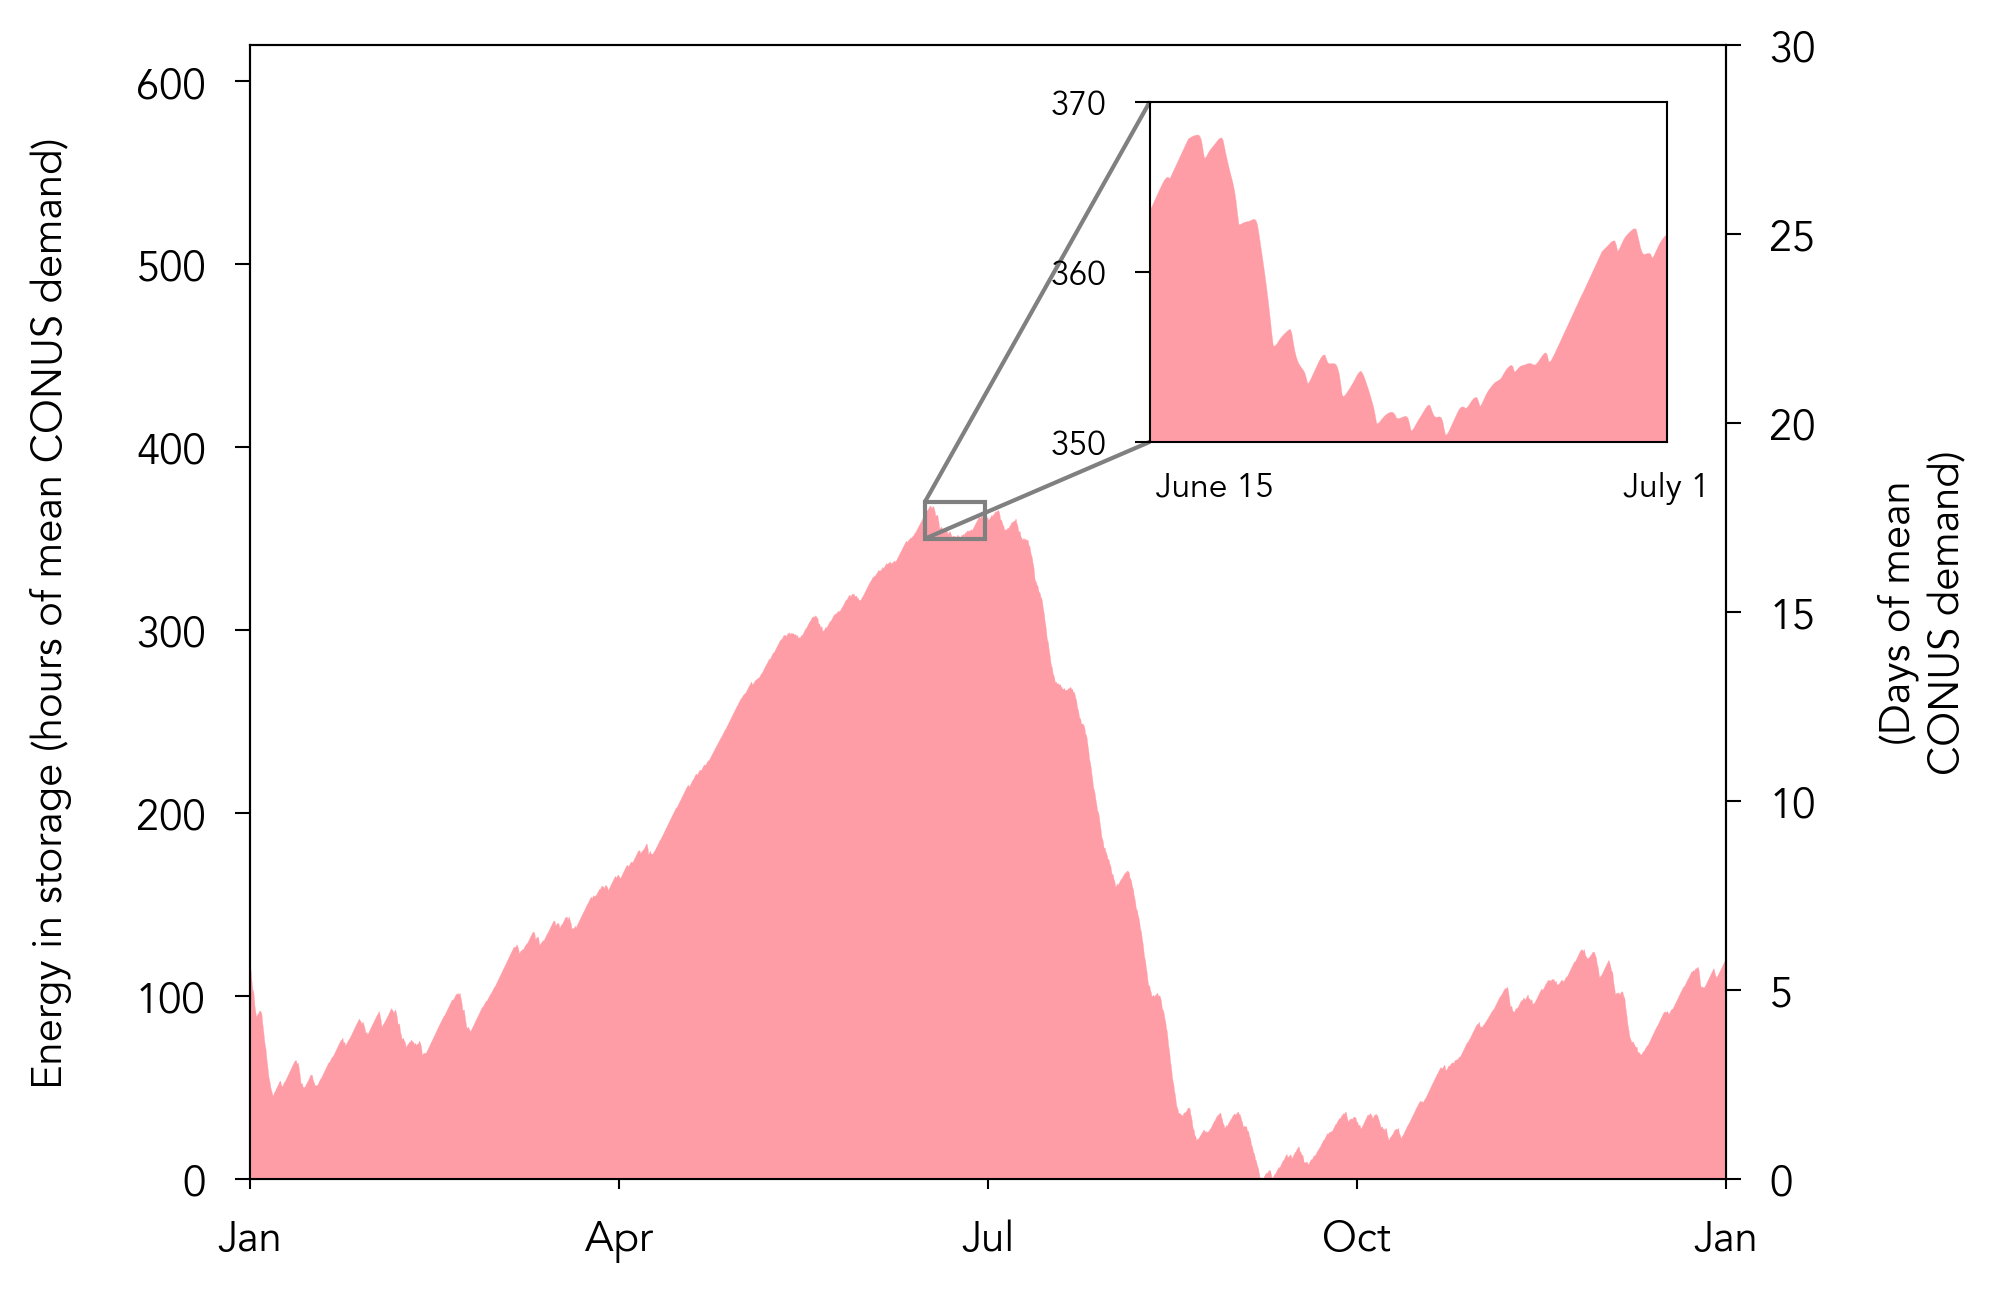

In [116]:
mm = 1/25.4 # millimeters in inches
fig_w = 172*mm
fig_h = 112*mm
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(fig_w, fig_h), dpi=300)

w = 0.075
pgp_max = 620
pgp_days_max = 30

def plot_energy(ax, energy, energy_max, color):
    ax.fill_between(dates, energy, color=color, linewidth=w)
    ax.set_xlim(dates[0], dates[-1])
    ax.set_ylim(0, energy_max)
    ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.xaxis.set_tick_params(direction='out', which='both', length=0)
    ax.yaxis.set_tick_params(direction='out', which='both')
    
def bottom_params(ax):
    ax.tick_params(axis='x', which='both', length=2.5)
    months = ['Jan', 'Apr', 'Jul', 'Oct', 'Jan']
    plt.xticks(np.linspace(dates[0], dates[-1], 5), months)
    
def left_params(ax):
    ax.set_yticklabels(ax.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
#########################################################################################################
#                       Plot case when hydrogen is the only storage technology                          #
#########################################################################################################


# PGP energy in storage
ax_days = ax.twinx()
pgp_energy_days = pgp_energy/24
plot_energy(ax_days, pgp_energy_days, pgp_days_max, pink)
ax_days.set_ylabel('(Days of mean\nCONUS demand)')

plot_energy(ax, pgp_energy, pgp_max, pink)
ax.set_ylabel('Energy in storage (hours of mean CONUS demand)')

bottom_params(ax)

# inset axes
axins = ax.inset_axes([0.61, 0.65, 0.35, 0.3])
plot_energy(axins, pgp_energy, pgp_max, pink)

# subregion of the original image 
beginning_of_june = 3647
beginning_of_july = 4367
x1 = dates[beginning_of_june + 15*24]
x2 = dates[beginning_of_july]
axins.set_xlim(x1, x2)
time_span = ['              June 15', 'July 1']
axins.set_xticks(np.linspace(x1, x2, 2), time_span)

axins.set_ylim(350, 370)
axins.set_yticks([350, 360, 370])

axins.tick_params(labelsize=8)

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

#=================================================================================================
plt.tight_layout()

plt.show()


In [47]:
len(dates)

8760

In [7]:
# Figure should have a height of 112 mm and a width of 172 mm

from PIL import Image

filepath = "test.jpg"
img = Image.open(filepath)

# get width and height
width = img.width * 25.4 / 300
height = img.height * 25.4 / 300
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

FileNotFoundError: [Errno 2] No such file or directory: 'test.jpg'

In [ ]:
fig = plt.figure(figsize=(50*mm,15*mm))

ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax.fill_between(dates, rfb_energy_2, interpolate=True, color=lightblue, linewidth=w)

ax.set_ylim(0, max(rfb_energy_2)*1.15)
ax.set_xlim(dates[0], dates[-1])

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.yaxis.set_tick_params(direction='out', which='both')
ax.xaxis.set_tick_params(direction='out', which='both')
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both',length=0)

In [ ]:
fig = plt.figure(figsize=(50*mm,15*mm))

ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax.plot_date(dates, batt_energy_2, '-',color=batt_q, linewidth=0.5)
ax.fill_between(dates, batt_energy_2, interpolate=True, color=batt_q)

ax.set_ylim(0, max(batt_energy_2)*1.15)
ax.set_xlim(dates[0], dates[-1])

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.yaxis.set_tick_params(direction='out', which='both')
ax.xaxis.set_tick_params(direction='out', which='both')
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both',length=0)